### OpenClose Gesture Model

In [466]:
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import joblib

import pandas as pd
from matplotlib import pyplot as plt

### Load the data

In [467]:
df = pd.read_csv('../hand_gesture_data.csv')
display(df.head())
df.shape

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_18_x,landmark_18_y,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,label
0,0.276323,0.753460,-4.515852e-07,0.238398,0.696058,0.089661,0.232125,0.637997,0.154875,0.252313,...,0.377746,0.587405,0.187257,0.369467,0.614180,0.205938,0.358980,0.627682,0.212425,fist
1,0.254258,0.770662,-4.773435e-07,0.206213,0.682273,0.055749,0.199476,0.585642,0.091445,0.225223,...,0.358536,0.551136,0.092553,0.351710,0.585877,0.110658,0.343067,0.612387,0.117245,fist
2,0.253370,0.769042,-4.975855e-07,0.209183,0.684782,0.067022,0.201734,0.591842,0.110957,0.224894,...,0.356756,0.550330,0.115920,0.350202,0.584881,0.136186,0.342798,0.610302,0.143226,fist
3,0.250273,0.773571,-4.878918e-07,0.205373,0.687684,0.066965,0.199759,0.592406,0.110448,0.225067,...,0.357360,0.554043,0.115564,0.351706,0.588611,0.136907,0.343233,0.614493,0.144765,fist
4,0.243162,0.772292,-4.981624e-07,0.196183,0.680283,0.063877,0.192004,0.585607,0.104756,0.218537,...,0.353181,0.550291,0.103899,0.348354,0.586723,0.122674,0.338579,0.613028,0.128992,fist


(3308, 64)

In [468]:
df['label'] = df['label'].map({'fist': 0, 'open_palm': 1})

In [469]:
df

,landmark_0_x,landmark_0_y,landmark_0_z,landmark_1_x,landmark_1_y,landmark_1_z,landmark_2_x,landmark_2_y,landmark_2_z,landmark_3_x,...,landmark_18_x,landmark_18_y,landmark_18_z,landmark_19_x,landmark_19_y,landmark_19_z,landmark_20_x,landmark_20_y,landmark_20_z,label
0,0.276323,0.753460,-4.515852e-07,0.238398,0.696058,0.089661,0.232125,0.637997,0.154875,0.252313,...,0.377746,0.587405,0.187257,0.369467,0.614180,0.205938,0.358980,0.627682,0.212425,0
1,0.254258,0.770662,-4.773435e-07,0.206213,0.682273,0.055749,0.199476,0.585642,0.091445,0.225223,...,0.358536,0.551136,0.092553,0.351710,0.585877,0.110658,0.343067,0.612387,0.117245,0
2,0.253370,0.769042,-4.975855e-07,0.209183,0.684782,0.067022,0.201734,0.591842,0.110957,0.224894,...,0.356756,0.550330,0.115920,0.350202,0.584881,0.136186,0.342798,0.610302,0.143226,0
3,0.250273,0.773571,-4.878918e-07,0.205373,0.687684,0.066965,0.199759,0.592406,0.110448,0.225067,...,0.357360,0.554043,0.115564,0.351706,0.588611,0.136907,0.343233,0.614493,0.144765,0
4,0.243162,0.772292,-4.981624e-07,0.196183,0.680283,0.063877,0.192004,0.585607,0.104756,0.218537,...,0.353181,0.550291,0.103899,0.348354,0.586723,0.122674,0.338579,0.613028,0.128992,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3303,0.655295,0.838592,3.941664e-07,0.693771,0.762013,0.010261,0.716153,0.687636,0.012883,0.740780,...,0.530941,0.574757,-0.008043,0.514585,0.528795,-0.009458,0.503436,0.489887,-0.010117,1
3304,0.655923,0.838971,3.985216e-07,0.694109,0.763058,0.010647,0.716215,0.688963,0.013343,0.740733,...,0.532661,0.574908,-0.008519,0.516255,0.529121,-0.009536,0.504636,0.491177,-0.009699,1
3305,0.655793,0.836599,3.860171e-07,0.694225,0.760560,0.011700,0.715957,0.688197,0.015386,0.739952,...,0.532998,0.573977,-0.008393,0.516173,0.527923,-0.010050,0.504368,0.488653,-0.010537,1
3306,0.656651,0.835137,3.630760e-07,0.695088,0.758815,0.013954,0.716632,0.686578,0.019255,0.739685,...,0.533298,0.572200,-0.005423,0.516742,0.525640,-0.007158,0.505285,0.486084,-0.007750,1


In [470]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'])

In [471]:
scaler = StandardScaler()

In [ ]:
X_train, X_test = scaler.fit_transform(X_train), scaler.transform(X_test)

# After fitting the scaler in your training script
joblib.dump(scaler, 'scaler.pkl')
y_train, y_test = y_train.to_numpy(), y_test.to_numpy()

In [473]:
X_train, X_test = torch.from_numpy(X_train).type(torch.float32), torch.from_numpy(X_test).type(torch.float32)
y_train, y_test = torch.from_numpy(y_train), torch.from_numpy(y_test)

In [474]:
type(X_train), type(y_train)

(torch.Tensor, torch.Tensor)

In [475]:
train_dataset = TensorDataset(X_train, y_train)
test_dataset = TensorDataset(X_test, y_test)

In [476]:
# hyperparameters
epochs = 150
lr = 1e-5
batch_size = 32
loss_fn = nn.BCEWithLogitsLoss()

train_batch = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_batch = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [477]:
X_train.shape[1]

63

In [478]:
class OCNet(nn.Module):
    def __init__(self, input_shape=X_train.shape[1], dropout_rate=0.2):
        super(OCNet, self).__init__()
        self.fc1 = nn.Linear(input_shape, 128)
        self.dropout_1 = nn.Dropout(dropout_rate)
        self.fc2 = nn.Linear(128, 80)
        self.dropout_2 = nn.Dropout(dropout_rate)
        self.fc3 = nn.Linear(80, 50)


        self.dropout_3 = nn.Dropout(dropout_rate)
        self.fc4 = nn.Linear(50, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout_1(x)

        x = F.relu(self.fc2(x))
        x = self.dropout_2(x)

        x = F.relu(self.fc3(x))
        x = self.dropout_3(x)


        x = self.fc4(x)

        return x        

In [479]:
model = OCNet()
optimizer = optim.Adam(model.parameters(), lr, weight_decay=0.001)

model # Quick summary

OCNet(
  (fc1): Linear(in_features=63, out_features=128, bias=True)
  (dropout_1): Dropout(p=0.2, inplace=False)
  (fc2): Linear(in_features=128, out_features=80, bias=True)
  (dropout_2): Dropout(p=0.2, inplace=False)
  (fc3): Linear(in_features=80, out_features=50, bias=True)
  (dropout_3): Dropout(p=0.2, inplace=False)
  (fc4): Linear(in_features=50, out_features=1, bias=True)
)

In [480]:
def train():
    loss_history = []
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0

        for feature,label in train_batch:
            output = model(feature).squeeze()

            optimizer.zero_grad()

            label = label.float()

            loss = loss_fn(output, label)
            running_loss+=loss.item()
            

            loss.backward()
            optimizer.step()

        print(f"{epoch} : LOSS: {running_loss}")
        loss_history.append(running_loss)

    
    return loss_history

In [481]:
loss_history = train()

0 : LOSS: 54.24571621417999
1 : LOSS: 53.67854446172714
2 : LOSS: 53.13480085134506
3 : LOSS: 52.61489248275757
4 : LOSS: 52.03867244720459
5 : LOSS: 51.37572067975998
6 : LOSS: 50.7646918296814
7 : LOSS: 49.95202594995499
8 : LOSS: 49.069471538066864
9 : LOSS: 48.153112947940826
10 : LOSS: 47.18840789794922
11 : LOSS: 45.96713465452194
12 : LOSS: 44.78182464838028
13 : LOSS: 43.43208009004593
14 : LOSS: 41.91968506574631
15 : LOSS: 40.684217274188995
16 : LOSS: 39.04304891824722
17 : LOSS: 37.34832999110222
18 : LOSS: 35.939400255680084
19 : LOSS: 34.352276265621185
20 : LOSS: 32.65709859132767
21 : LOSS: 30.90727797150612
22 : LOSS: 29.519887328147888
23 : LOSS: 28.00628262758255
24 : LOSS: 26.250339046120644
25 : LOSS: 24.561465069651604
26 : LOSS: 23.281524762511253
27 : LOSS: 21.971503481268883
28 : LOSS: 20.807397335767746
29 : LOSS: 19.407070383429527
30 : LOSS: 18.25942324101925
31 : LOSS: 17.17390263080597
32 : LOSS: 16.436910793185234
33 : LOSS: 15.212750121951103
34 : LOSS: 

In [482]:
# A corrected test loop for binary classification
def test_loop():
    model.eval()

    all_labels = []
    all_predictions = []

    acc_history = []



    with torch.no_grad():
        for features, labels in test_batch:
            # Make predictions
            output = model(features).squeeze()
            
            # Apply a threshold to get binary predictions.
            # .round() converts values > 0.5 to 1 and values < 0.5 to 0.
            predicted = torch.round(torch.sigmoid(output))
            
            # Convert the labels to float to match the predictions for comparison
            # This is a good practice to avoid further type mismatch errors.
            labels = labels.float()
            
            # Count correct predictions
            all_predictions.extend(predicted.detach().cpu().numpy())
            all_labels.extend(labels.detach().cpu().numpy())

            accuracy = accuracy_score(all_labels, all_predictions)
            acc_history.append(accuracy)
        print(f"Test Accuracy: {accuracy:.2f}%")

        return acc_history

In [483]:
acc_history = test_loop()

Test Accuracy: 1.00%


In [484]:
epoch_history = [i for i in range(epochs)]


Text(0, 0.5, 'Loss')

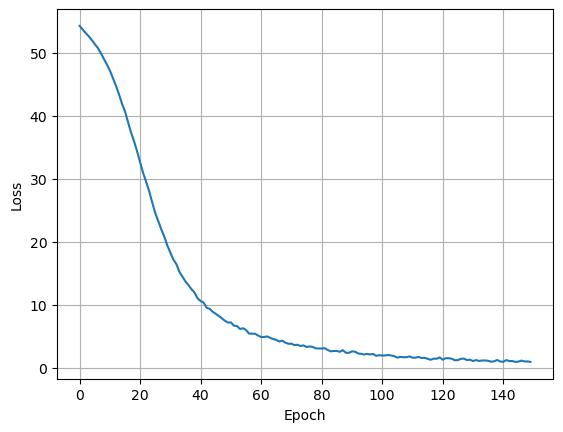

In [485]:
plt.plot(epoch_history, loss_history)
plt.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Loss")

In [486]:
file_path = 'ocnet_model_weight.pth'
torch.save(model.state_dict(), file_path)